<a href="https://colab.research.google.com/github/OlegV12/Neural/blob/Lesson_2/Lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Практическое задание

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
#import mnist
#import tensorflow as tf
#import tf.kears as keras
import keras
from keras.datasets import mnist, boston_housing, fashion_mnist  # наборы для работы

In [2]:
(train_image_f,train_label_f),(test_image_f,test_label_f)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


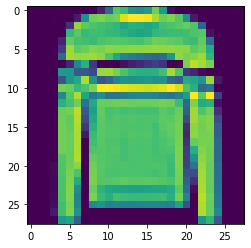

In [3]:
plt.imshow(train_image_f[5,:,:])
plt.show()

In [4]:

# Normalize the images.
train_imagef = (train_image_f / 127) - 1
test_imagef = (test_image_f / 127) - 1

# Flatten the images.
train_image_f = train_imagef.reshape((-1, 784))
test_image_f = test_imagef.reshape((-1, 784))

y_t = to_categorical(train_label_f)
y_tt = to_categorical(test_label_f)

print(train_image_f.shape) # (60000, 784)
print(test_image_f.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [5]:
def neural(neurons=64, i_optim='SGD', input_shape=(784,), output_shape=10, layers=2, epochs=15):
  # создаем модель model
  model = Sequential([
                      Dense(neurons, activation='relu', input_shape=input_shape),
                      ])

  # добавляем слои
  for i in range(layers-2):
    model.add(Dense(neurons, activation='relu', ))


  # добавляем выходной слой 
  model.add(Dense(output_shape, activation='softmax')) 
  
  # сохраняем веса
  model.save_weights('model.h5')

  

  # число рабочих эпох
  epochs = 15
  # вектор для выводв результатов
  epoch = np.arange(epochs+1)

  # создаем рабочую модель modeli куда будем загружать эти веса и параметры (она должна быть идентичной структуры)
  modeli = Sequential([
                       Dense(neurons, activation='relu', input_shape=input_shape),
                      ])


  for i in range(layers-2):
    modeli.add(Dense(neurons, activation='relu', ))

  modeli.add(Dense(output_shape, activation='softmax')) 

  # загружаем веса 
  modeli.load_weights('model.h5')

  # компилируем modeli с одним из оптимизаторов
  modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  # вычисляем ошибку для modeli без обучения
  hh0_tr = modeli.evaluate(  train_image_f[:48000,:], to_categorical(train_label_f[:48000]),verbose = 0)
  hh0_val = modeli.evaluate(  train_image_f[48000:,:], to_categorical(train_label_f[48000:]),verbose = 0)
  # проводим обучение модели 
  hh = modeli.fit(
                  train_image_f,
                  to_categorical(train_label_f),
                  epochs=epochs,
                  batch_size=32, validation_split=0.2, verbose = 0
                  )
  modeli.evaluate(train_image_f, y_t)
  modeli.evaluate(test_image_f, y_tt)
  

  # картинки
  plt.figure(figsize=(16,7))
  plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = modeli.optimizer.get_config()['name']+' train')
  plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = modeli.optimizer.get_config()['name']+' val')
  plt.legend()
  plt.grid('On')

  plt.title('нейросети от оптимизатора log(loss)')
  plt.xlabel('epoch')
  plt.ylabel('log(loss)')
  plt.show()


313/313 [==============================] - 1s 3ms/step - loss: 0.4446 - accuracy: 0.8405


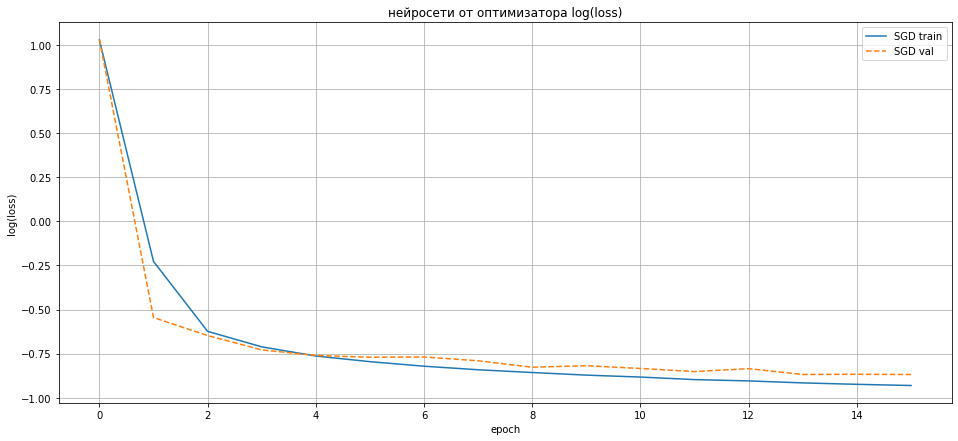

313/313 [==============================] - 1s 3ms/step - loss: 0.3956 - accuracy: 0.8605


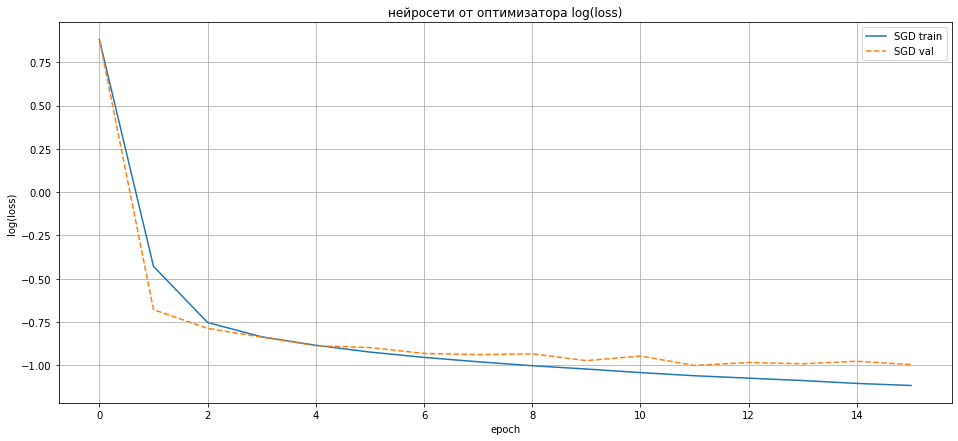

313/313 [==============================] - 1s 3ms/step - loss: 0.3790 - accuracy: 0.8668


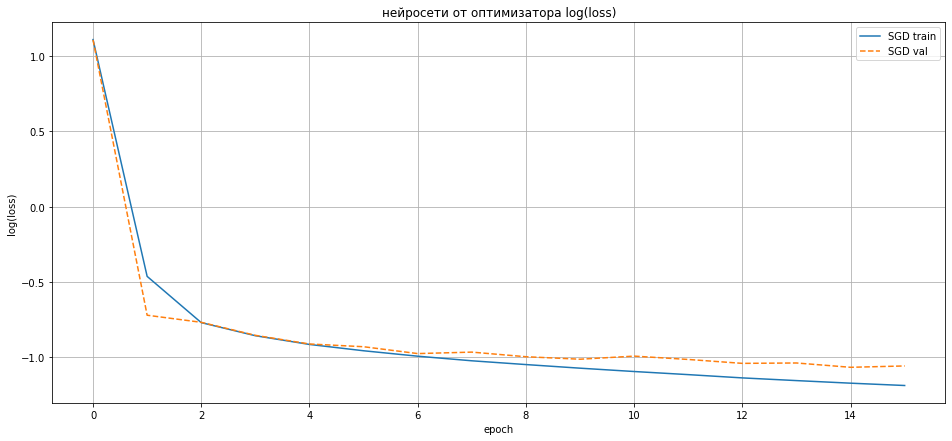

313/313 [==============================] - 1s 3ms/step - loss: 0.3782 - accuracy: 0.8656


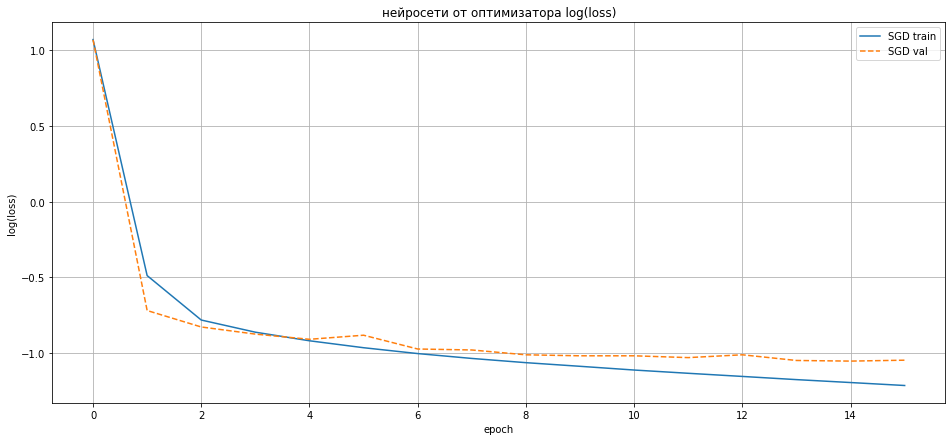

In [6]:
for i in [10, 30, 60, 90,]:
  neural(neurons=i)

313/313 [==============================] - 1s 3ms/step - loss: 0.3795 - accuracy: 0.8676


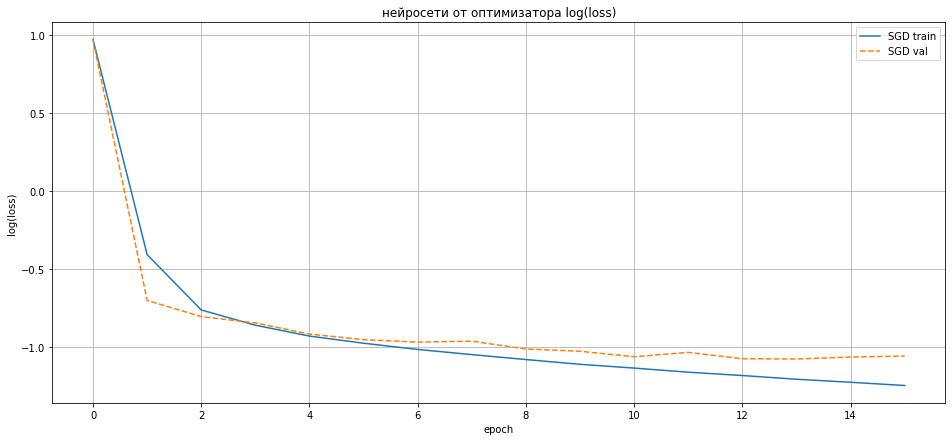

In [7]:
neural(layers=3, neurons=55)

313/313 [==============================] - 1s 3ms/step - loss: 0.3707 - accuracy: 0.8669


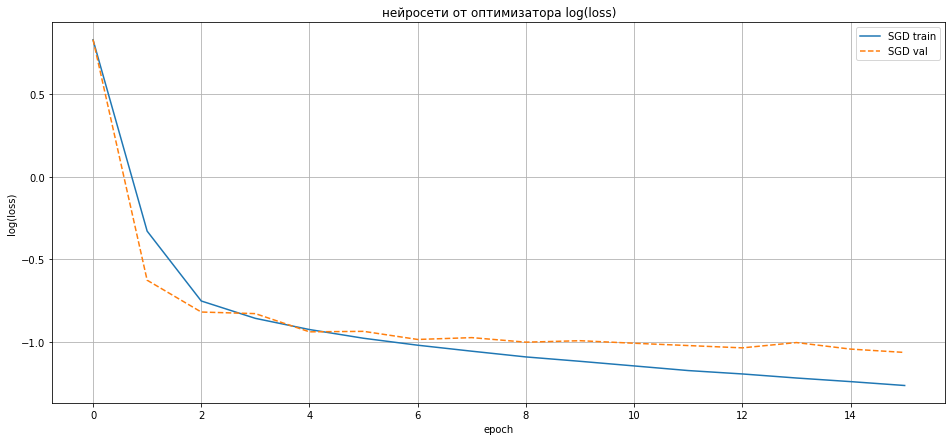

In [8]:
neural(layers=5, neurons=50)

313/313 [==============================] - 1s 3ms/step - loss: 0.3942 - accuracy: 0.8587


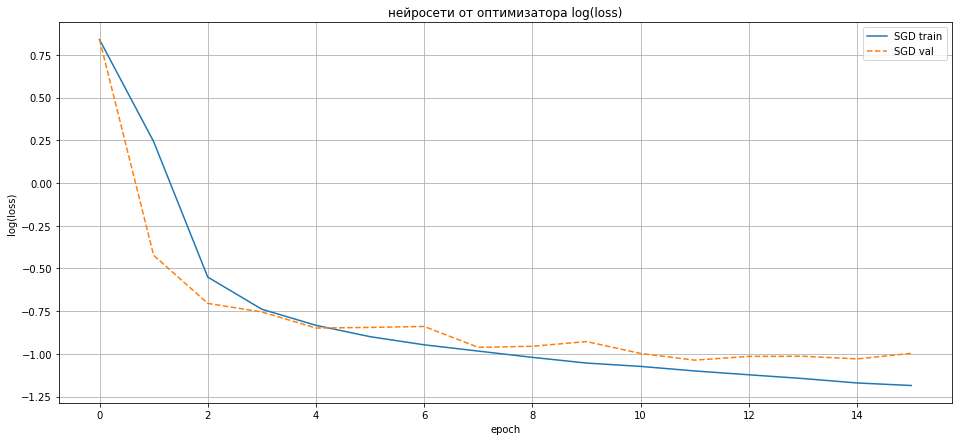

In [9]:
neural(layers=10, neurons=40)

313/313 [==============================] - 1s 3ms/step - loss: 0.3612 - accuracy: 0.8693


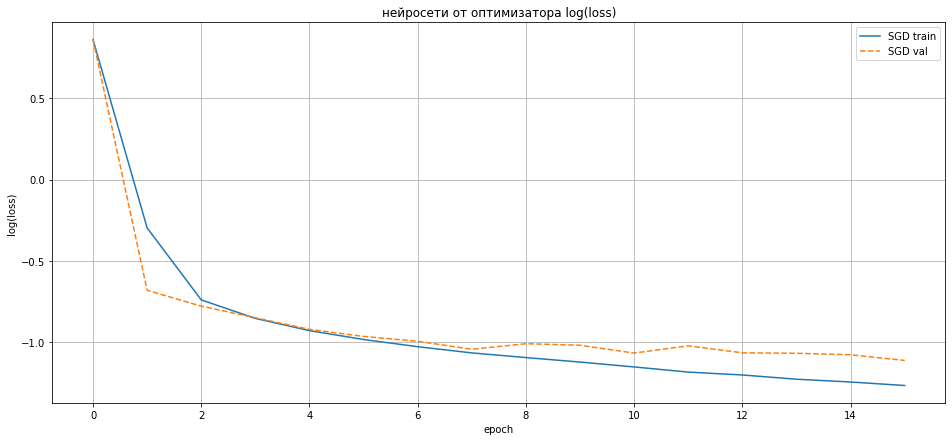

313/313 [==============================] - 1s 3ms/step - loss: 0.6881 - accuracy: 0.8265


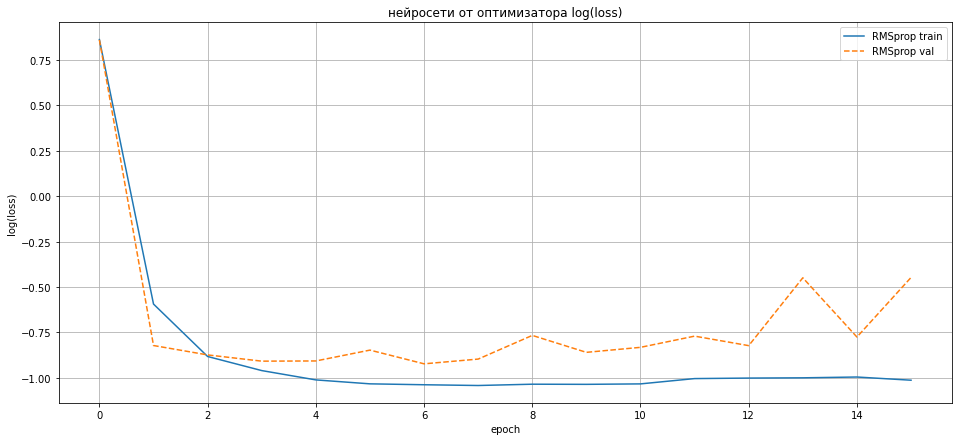

313/313 [==============================] - 1s 3ms/step - loss: 0.3678 - accuracy: 0.8734


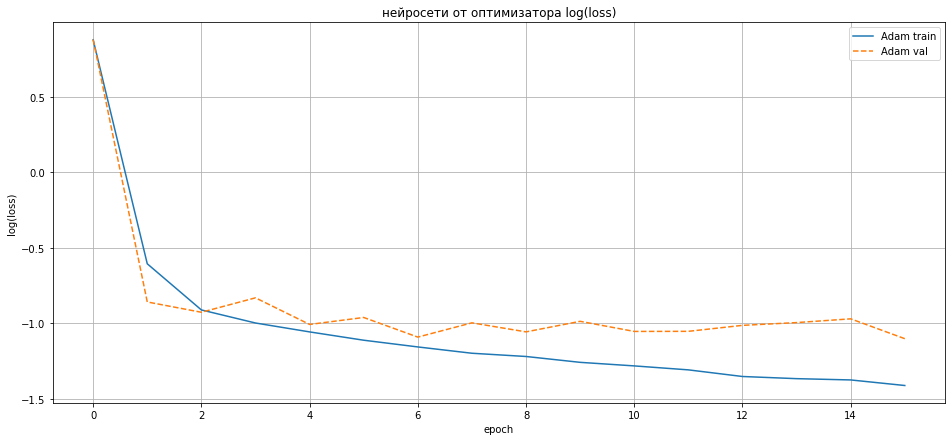

313/313 [==============================] - 1s 3ms/step - loss: 0.4919 - accuracy: 0.8259


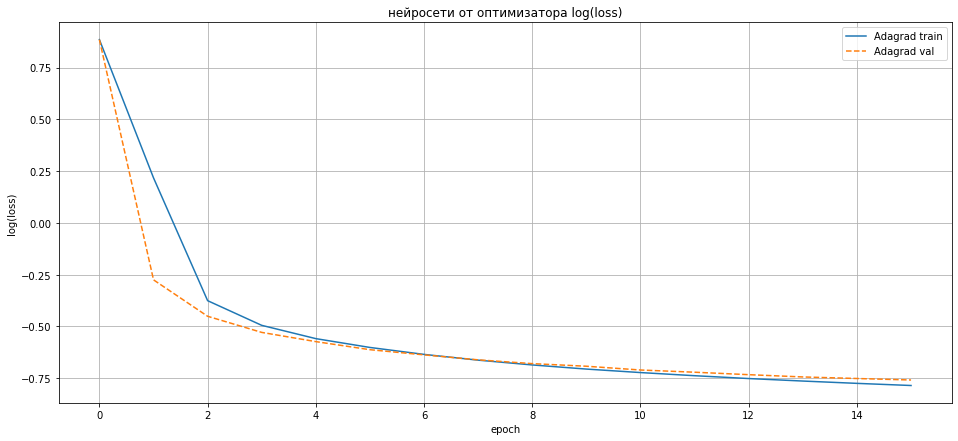

In [10]:
for i in ['SGD', 'RMSprop', 'Adam', 'Adagrad']:
  neural(layers=5, neurons=50, i_optim=i)

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [12]:
final_model = Sequential([
                        Dense(50, activation='relu', input_shape=(784,)),
                        Dense(50, activation='tanh'),
                        Dense(50, activation='tanh'),
                        Dense(50, activation='tanh'),

                        Dense(10, activation='softmax'),
                        ])


final_model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    )
hh = final_model.fit(
                train_image_f,
                y_t,
                epochs=15,
                batch_size=32, validation_split=0.2, verbose = 0
                )

In [13]:
predictions = final_model.predict(test_image_f)

In [14]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
 
import seaborn
import matplotlib.pyplot as plt
 
 
def plot_confusion_matrix(data, labels):

    seaborn.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
 
    plt.title("Confusion Matrix")
 
    seaborn.set(font_scale=1.4)
    ax = seaborn.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
 
    ax.set(ylabel="True Label", xlabel="Predicted Label")
 
 
 


In [15]:
confusion = confusion_matrix(np.argmax(predictions, axis=1), test_label_f)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[820   6  14  18   0   0 119   0   2   0]
 [  4 960   6  14   1   0   1   0   4   0]
 [ 13   1 831  13 138   0 113   0   2   0]
 [ 36  25  10 877  33   0  29   0   6   0]
 [  3   4  76  31 785   0  92   0   3   0]
 [  1   0   2   1   1 958   1  22   3  18]
 [114   3  55  41  37   0 632   0   8   0]
 [  0   0   0   0   0  31   0 953   5  36]
 [  9   1   6   5   5   2  13   1 967   1]
 [  0   0   0   0   0   9   0  24   0 945]]


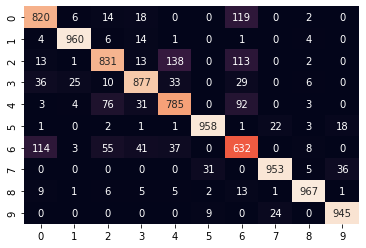

In [16]:
sns.heatmap(confusion, annot=True, fmt="d", cbar=False,)

С увеличением количества нейронов улучшается качество модели, при этом увеличение числа слоев при соразмерной модели не дало критического улучшения. Лучший оптимизатор - Adam. Худшие показатели предсказаний на 6м и 4м классе.